In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta

In [2]:
df_train = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\df_train.csv', low_memory = False)
df_test = pd.read_csv(r'C:\Users\Niti\NEXT HIKES\PROJECT 6\df_test.csv', low_memory = False)

Task 2 - Prediction of store sales

2.1 Preprocessing

In [3]:
df_train.head(2)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year,Distance_to_Competitor
0,2015-07-31,1,5,5263,555,1,1,0,1,c,...,2008.0,0,0.0,0.0,0,31,31,7,2015,1270.0
1,2015-07-31,2,5,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,31,7,2015,570.0


In [4]:
df_test.head(2)

,Date,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Week,Month,Year
0,2015-09-17,1,1,4,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,0,17,38,9,2015
1,2015-09-17,2,3,4,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",17,38,9,2015


Missing values have already been handled and new features have also been generated like Day, Week, Month & Year. Now we ll convert non numeric columns to numeric ones

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Date                       1017209 non-null  object 
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [6]:
df_train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [7]:
df_train['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [8]:
df_train['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [9]:
df_train['PromoInterval'].unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

Ordinal Encoding

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
ordinal_columns = ['StateHoliday','StoreType','Assortment','PromoInterval']
encoder = OrdinalEncoder()
df_train[ordinal_columns] = encoder.fit_transform(df_train[ordinal_columns])
df_test[ordinal_columns] = encoder.fit_transform(df_test[ordinal_columns])


In our case, you have a few datetime columns to preprocess. you can extract the following from them:
-	weekdays
-	weekends 
-	number of days to holidays
-	Number of days after holiday
-	Beginning of month, mid month and ending of month
			


In [12]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Weekdays'] = df_train['Date'].dt.weekday
df_train['Weekends'] = (df_train['Date'].dt.weekday >= 5).astype(int)

In [13]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Weekdays'] = df_test['Date'].dt.weekday
df_test['Weekends'] = (df_test['Date'].dt.weekday >= 5).astype(int)

In [14]:
#df_train['StateHoliday'] = pd.to_datetime(df_train['StateHoliday'])
#df_train['SchoolHoliday'] = pd.to_datetime(df_train['SchoolHoliday'])
df_train['Days_to_Holiday'] = (df_train[df_train['StateHoliday'] == 1]['Date'] - df_train['Date']).min()
df_train['Days_after_Holiday'] = (df_train['Date'].max() - df_train[df_train['StateHoliday'] == 1]['Date'])
#df_train['Days_to_schoolholiday'] = (df_train[df_train['SchoolHoliday'] == 1]['Date'] - df_train['Date'].min())
#df_train['Days_after_schoolholiday'] = (df_train['Date'].max() - df_train[df_train['SchoolHoliday'] == 1]['Date'])


In [15]:
df_train['Days_to_Holiday'] = df_train['Days_to_Holiday'].dt.days
df_train['Days_after_Holiday'] = df_train['Days_after_Holiday'].dt.days
df_train['Days_after_Holiday'].fillna(0, inplace=True)

In [16]:
df_train['Beginning_of_month'] = df_train['Date'].dt.is_month_start.astype(int)
df_train['Mid_month'] = ((df_train['Date'].dt.day >= 10) & (df_train['Date'].dt.day <= 20)).astype(int)
df_train['End_of_month'] = df_train['Date'].dt.is_month_end.astype(int)

In [17]:
df_test['Beginning_of_month'] = df_test['Date'].dt.is_month_start.astype(int)
df_test['Mid_month'] = ((df_test['Date'].dt.day >= 10) & (df_test['Date'].dt.day <= 20)).astype(int)
df_test['End_of_month'] = df_test['Date'].dt.is_month_end.astype(int)

New columns have been added in both train and test set

Setting Date column as index

In [18]:
df_train = df_train.set_index(['Date'])

In [19]:
df_test = df_test.set_index(['Date'])

Scaling and PCA

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

We ll take only train dataset here because Sales is not there in test dataset

In [21]:
#X = df_train.drop('Sales', axis = 1)
X = df_train[['Customers','Open','Promo','StateHoliday','SchoolHoliday','CompetitionDistance','Day','Week','Month','Year']]
y = df_train.Sales

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rfr = RandomForestRegressor()
rfr.fit(X_train_pca, y_train)


In [23]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_data, columns= df_train.columns)

2.2 Building models with sklearn pipelines

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score


In [25]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [26]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
pipeline_rfr = Pipeline([
    ('imputer', imputer),
    ('scaler',scaler),
    ('model_rfr',model_rfr)
])

In [28]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
pipeline_rfr.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model_rfr', RandomForestRegressor(random_state=42))])

In [30]:
pipeline_rfr.score(X_test, y_test)

0.9613334706038533

In [31]:
rfr_pred = pipeline_rfr.predict(X_test)

In [32]:
rfr_score = r2_score(y_test, rfr_pred)
rfr_score

0.9613334706038533

In [33]:
model_dt = DecisionTreeRegressor()

In [34]:
pipeline_dt = Pipeline([
    ('imputer', imputer),
    ('scaler',scaler),
    ('model_dt',model_dt)
])

In [35]:
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model_dt', DecisionTreeRegressor())])

In [36]:
pipeline_dt.score(X_test, y_test)

0.924742825736699

In [37]:
dt_pred = pipeline_dt.predict(X_test)

In [38]:
dt_score = r2_score(y_test, dt_pred)
dt_score

0.924742825736699

In [41]:
#param_grid = {
    'model__n_estimators': [50,100,200],
    'model__max_depth' : [None,10,20],
    'model__min_samples_split': [2,5,10]
}

IndentationError: unexpected indent (485682361.py, line 2)

In [38]:
#grid_search = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs= 1)
#grid_search.fit(X_train, y_train)

In [ ]:
#print("Best parameters:", grid_search.best_params_)
#print("Best score:", grid_search.best_score_)

NameError: name 'grid_search' is not defined

2.3 Choose a loss function

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, rfr_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 571831.4219149183
Root Mean Squared Error: 756.1953596227091
Mean Absolute Error: 448.1701462125706


In [40]:
mse = mean_squared_error(y_test, dt_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, dt_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1112963.0106541421
Root Mean Squared Error: 1054.9706207540294
Mean Absolute Error: 603.7813234238752


2.4 Post Prediction analysis
Explore the feature importance from our modelling. Creatively deduce a way to estimate the confidence interval of your predictions.


In [41]:
# Assuming 'pipeline_rfr' is our trained Random Forest Regressor pipeline
feature_importance = pipeline_rfr.named_steps['model_rfr'].feature_importances_
feature_importance


array([8.60534435e-01, 0.00000000e+00, 2.30730085e-02, 1.76888873e-04,
       1.38352628e-03, 8.95135413e-02, 1.01766202e-02, 7.75439886e-03,
       3.95536377e-03, 3.43221687e-03])

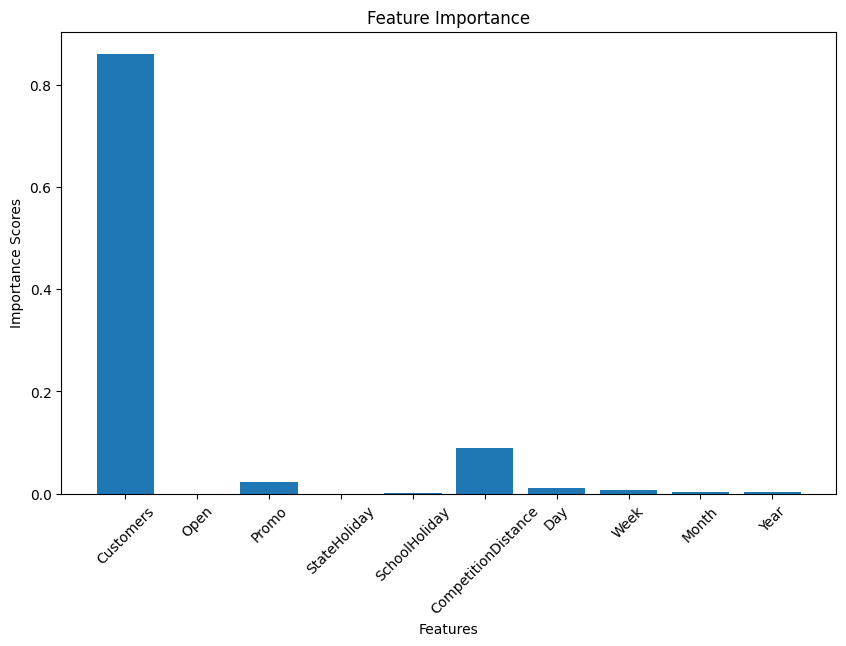

In [42]:
# Visualize Feature Importance

plt.figure(figsize=(10, 6))
features = X.columns.tolist()
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

Confidence Interval Estimation

Bootstrap Method

In [53]:
def bootstrap_confidence_intervals(pipeline_rfr, X, n_iterations=1000):
    predictions = []
    for _ in range(n_iterations):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_resampled = X.iloc[indices]
        rfr_pred = pipeline_rfr.predict(X_resampled)
        predictions.append(rfr_pred)
    
    predictions = np.array(predictions)
    lower_bound = np.percentile(predictions, 2.5, axis=0)
    upper_bound = np.percentile(predictions, 97.5, axis=0)
    return lower_bound, upper_bound

lower_bound, upper_bound = bootstrap_confidence_intervals(pipeline_rfr, X_test)

Prediction Intervals

In [47]:
from scipy.stats import norm

def prediction_intervals(pipeline_rfr, features, alpha=0.05):
    rfr_pred = pipeline_rfr.predict(features)
    std_error = np.std([tree.predict(features) for tree in pipeline_rfr.named_steps['model_rfr'].estimators_], axis=0)
    z_score = norm.ppf(1 - alpha / 2)
    lower_bound = rfr_pred - z_score * std_error
    upper_bound = rfr_pred + z_score * std_error
    return lower_bound, upper_bound

lower_bound, upper_bound = prediction_intervals(pipeline_rfr, X_test)

c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Niti\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted w

In [48]:
lower_bound

array([-1204.58414652,  2193.07258343,  3600.05820187, ...,
        -517.48179813, -1204.58414652, 10523.99820187])

In [49]:
upper_bound

array([ 1204.58414652,  9666.42741657, 10926.64179813, ...,
        6809.10179813,  1204.58414652, 17850.58179813])

2.5 Serialize models
To serve the models you built above, you need to serialize them. Save the model with the timestamp(eg. 10-08-2020-16-32-31-00.pkl). This is necessary so that you can track predictions from various models.



To save the file

In [ ]:
import pickle
timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S-%f")
filename = f"{timestamp}.pkl"

with open(filename, 'wb') as file:
    pickle.dump(pipeline,file)

To read the file

In [ ]:
with open(filename, 'rb') as file:
    pipeline = pickle.load(file)